In [1]:
import matplotlib.pyplot as plt


In [2]:
import numpy as np


In [3]:
import datetime as dt


In [4]:
from datetime import datetime, timedelta


In [5]:
# AvgTemperature=np.loadtxt( "asspy.csv", dtype="float", delimiter=",", skiprows=1, usecols =(0)) 
# Month, Day, Year = np.loadtxt( "asspy.csv", dtype="int", delimiter=",", skiprows=1, usecols =(2, 3, 4), unpack= True) 
# Dates = np.loadtxt( "asspy.csv", dtype="M", delimiter=",", skiprows=1, usecols =(5)) 
# keep=np.abs (AvgTemperature)<90 
# temperature = AvgTemperature[keep]
# dts = Dates[keep]
# plt.plot(dts, temperature, '.')
# plt.plot(temperature,dts, '.')
# Country =np.loadtxt( "asspy.csv", dtype="S", delimiter=",", skiprows=1, usecols =(6)) 
# ke = np.char.find(Country,'Kenya')
# belowke = ke[keep]
# Kenya_dates = dts[belowke]
# plt.plot(temperature,Kenya_dates, '.')


In [18]:
AvgTemperatureKe = np.loadtxt( "Kenyadts.csv", dtype="float", delimiter=",", skiprows=1, usecols =(0)) 


In [19]:
KeDates = np.loadtxt( "Kenyadts.csv", dtype="M", delimiter=",", skiprows=1, usecols =(1)) 


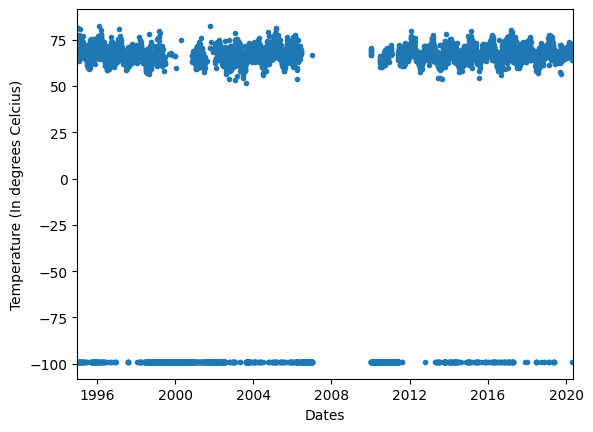

In [43]:
x_min = datetime.datetime(1995, 1, 1)
x_max = datetime.datetime(2020, 5, 13)
plt.plot(KeDates, AvgTemperatureKe, '.')
plt.xlim(x_min, x_max)
plt.xlabel('Dates')
plt.ylabel('Temperature (In degrees Celcius)')
plt.show()

In [21]:
keepForKe=np.abs (AvgTemperatureKe)<90 


In [22]:
Ke_temperature = AvgTemperatureKe[keepForKe]


In [23]:
Ke_dts = KeDates[keepForKe]


In [24]:
import datetime
Ke_dt_objects = np.array([np.datetime64(date).astype(datetime.datetime) for date in Ke_dts])

# Extract day and month values
Ke_day = np.array([date.day for date in Ke_dt_objects])
Ke_month = np.array([date.month for date in Ke_dt_objects])
Ke_year = np.array([date.year for date in Ke_dt_objects])



In [25]:
print(Ke_day)

[ 2  3  4 ... 11 12 13]


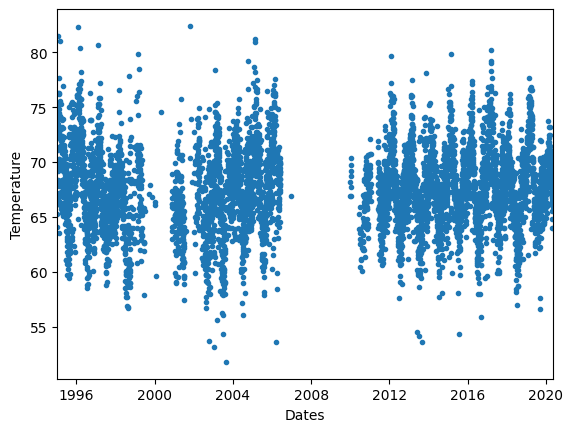

In [44]:
x_min = datetime.datetime(1995, 1, 1)
x_max = datetime.datetime(2020, 5, 13)
plt.plot(Ke_dts, Ke_temperature, '.')
plt.xlim(x_min, x_max)
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.show()


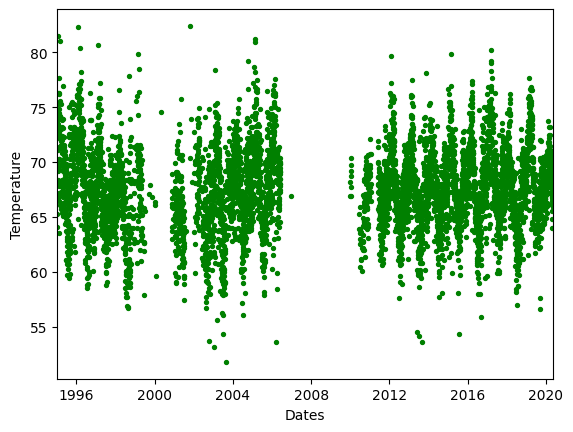

In [51]:
# plt.scatter(x, y, s=50, c='red')
x_min = datetime.datetime(1995, 1, 1)
x_max = datetime.datetime(2020, 5, 13)
plt.scatter(Ke_dts, Ke_temperature, s=8, c='green')
plt.xlim(x_min, x_max)
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.show()

In [28]:
import scipy
from scipy.optimize import curve_fit


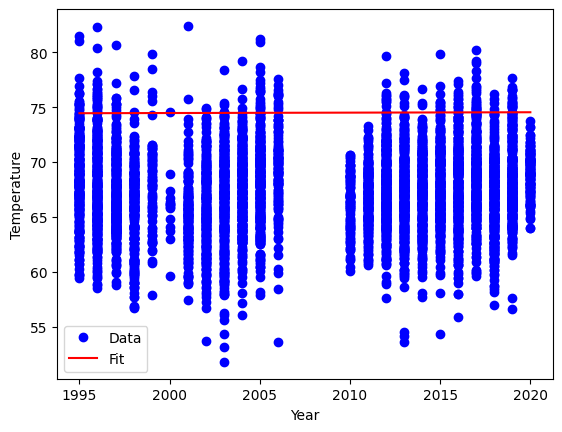

In [90]:
def func(x, a, b, c):
    return x * np.cos(a)*(2 * np.pi * a + b) + c

popt, pcov = curve_fit(func, Ke_day, Ke_temperature)

x_values = np.linspace(Ke_year.min(), Ke_year.max(), 1000)

# Evaluate the function at the x values using the optimized parameters
y_values = func(x_values, *popt)

# Plot the data and fitted curve
plt.plot(Ke_year, Ke_temperature, 'bo', label='Data')
plt.plot(x_values, y_values, 'r-', label='Fit')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

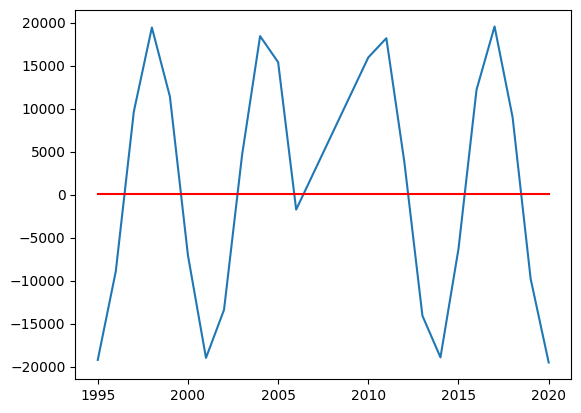

In [57]:
plt.plot(Ke_year, func(popt[0], Ke_year, popt[1], popt[2]), alpha=1)
plt.plot(x_values, y_values, 'r-', label='Fit')


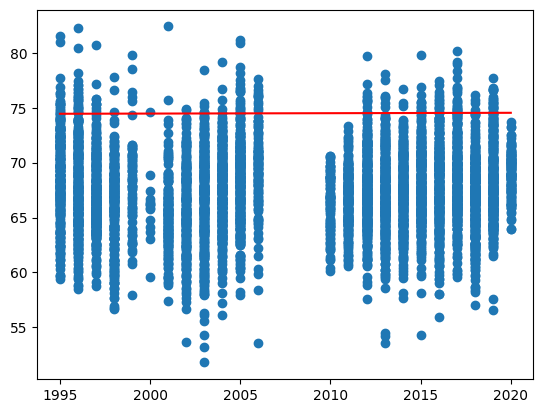

In [31]:
plt.plot(Ke_year, Ke_temperature, 'o', label='Data')
plt.plot(x_values, y_values, 'r-', label='Fit')


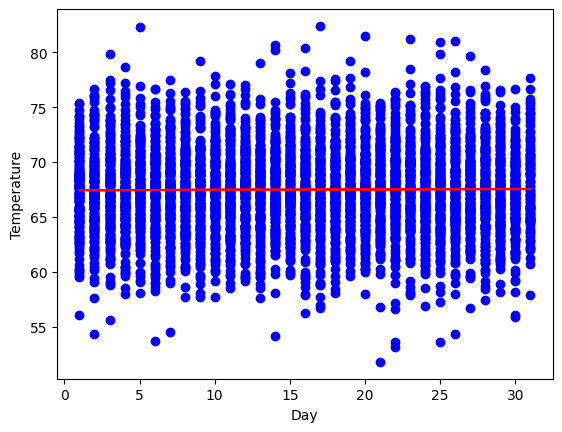

In [88]:
# func(popt[0], Ke_year, popt[1], popt[2]), alpha=1
from scipy import optimize
popt_new, pcov_new = optimize.curve_fit(func, Ke_day, Ke_temperature)
x_values = np.linspace(0, 10, 100)

plt.plot(Ke_day, Ke_temperature, 'bo')
plt.plot(Ke_day, func(Ke_day, *popt_new), 'r-')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()




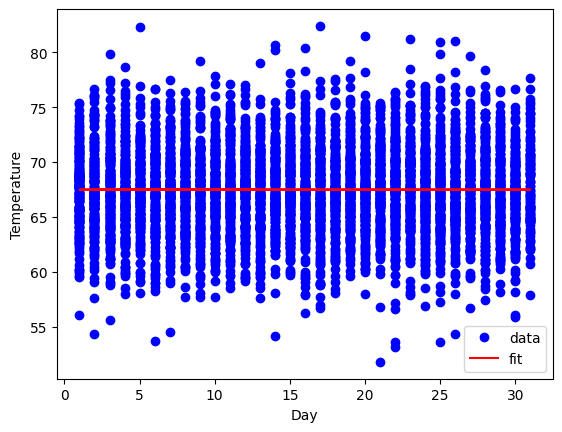

In [33]:
def funct(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

popt, pcov = curve_fit(funct, Ke_day, Ke_temperature)

plt.plot(Ke_day, Ke_temperature, 'bo', label='data')
plt.plot(Ke_day, funct(Ke_day, *popt), 'r-', label='fit')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()


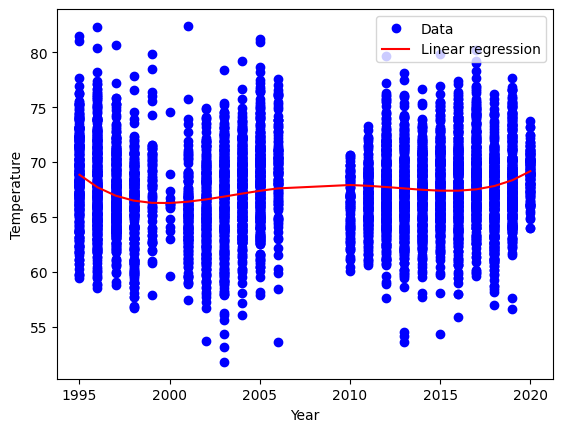

In [84]:
import numpy as np

# Fit a linear regression line to the data
coeffs = np.polyfit(Ke_year, Ke_temperature, 4)
line = np.polyval(coeffs, Ke_year)

# Plot the data and linear regression line
plt.plot(Ke_year, Ke_temperature, 'bo', label='Data')
plt.plot(Ke_year, line, 'r-', label='Linear regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


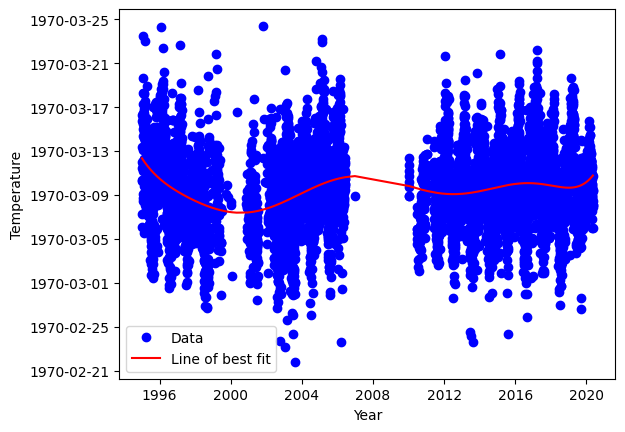

In [71]:
import matplotlib.dates as mdates

# Convert dates to numerical format
num_dates = mdates.date2num(Ke_dts)

# Fit a second-order polynomial to the data
coeffs = np.polyfit(num_dates, Ke_temperature, 10)
line = np.polyval(coeffs, num_dates)

# Plot the data and line of best fit
plt.plot(Ke_dts, Ke_temperature, 'bo', label='Data')
plt.plot(Ke_dts, mdates.num2date(line), 'r-', label='Line of best fit')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


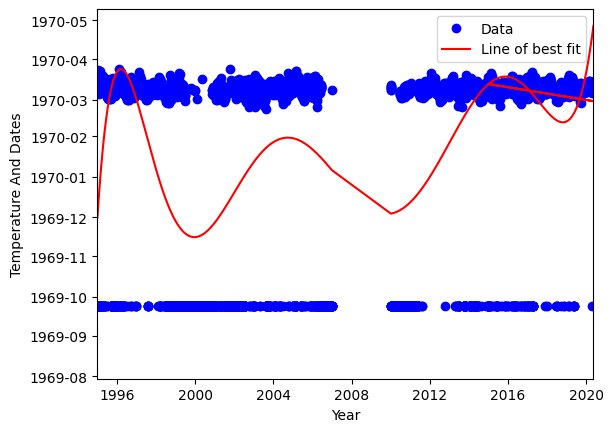

In [76]:
import matplotlib.dates as mdates

# Convert dates to numerical format
num_dates = mdates.date2num(KeDates)
KeDates, AvgTemperatureKe
# Fit a second-order polynomial to the data
coeffs = np.polyfit(num_dates, AvgTemperatureKe, 10)
line = np.polyval(coeffs, num_dates)

#Limits
x_min = datetime.datetime(1995, 1, 1)
x_max = datetime.datetime(2020, 5, 13)

# Plot the data and line of best fit
plt.plot(KeDates, AvgTemperatureKe, 'bo', label='Data')
plt.xlim(x_min, x_max)
plt.plot(KeDates, mdates.num2date(line), 'r-', label='Line of best fit')
plt.xlabel('Year')
plt.ylabel('Temperature And Dates')
plt.legend()
plt.show()
